**Toy Dataset**

In [162]:
import numpy as np
import pandas as pd

def make_data(num_point, r=0.1, sampling_in=0.1, sampling_out=0.8):
  num = int(np.sqrt(num_point))
  x_range = list(np.linspace(-1, 1, num))
  X = np.ones(shape=(num_point, 2))

  i = 0
  y = np.ones(shape=(num_point,))
  for x1 in x_range:
    for x2 in x_range:
      X[i, 0] = x1
      X[i, 1] = x2     
      if x1**2 + x2**2 <= r:
        y[i] = 0
      i += 1
  idx0 = np.where(y==0)[0].tolist()
  idx1 = np.where(y==1)[0].tolist()

  new_idx0 = np.random.choice(idx0, int(len(idx0)*sampling_in), replace=False).tolist()
  new_idx1 = np.random.choice(idx1, int(len(idx1)*sampling_out), replace=False).tolist()

  new_X = X[new_idx0+new_idx1,]
  new_y = y[new_idx0+new_idx1]

  return new_X, new_y

(813, 2) (813,)


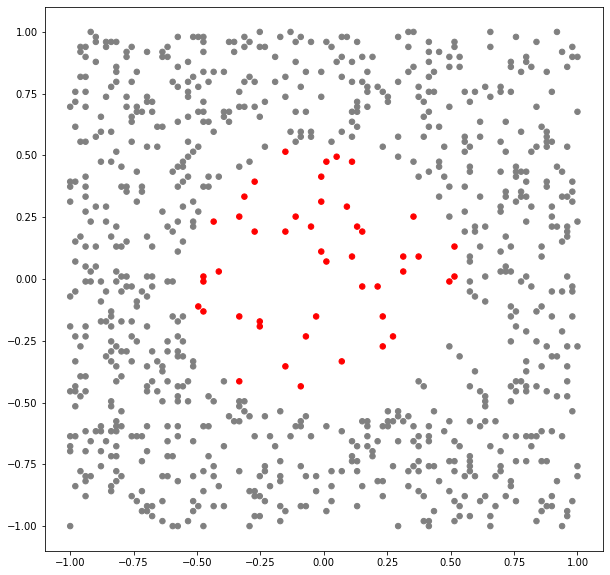

In [231]:
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_data(10000, r=0.3, sampling_in=0.02, sampling_out=0.1)
print(X.shape, y.shape)

color = ['red' if yi==0 else 'gray' for yi in y]
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=30, c=color)
plt.show()

**SMOTE**

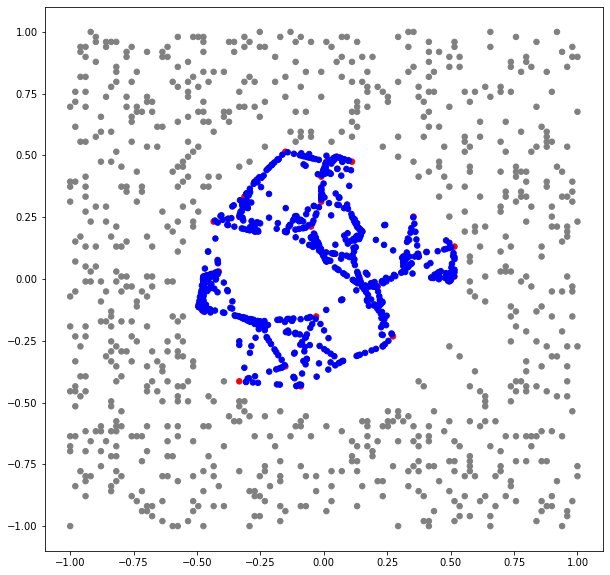

In [232]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(k_neighbors=5)
new_X, new_y = sampler.fit_resample(X, y)

from copy import deepcopy
new_color = deepcopy(color)
for i, yi in enumerate(new_y):
  if i >= y.shape[0]:
    new_color.append('blue')
    
plt.figure(figsize=(10, 10))
plt.scatter(new_X[:, 0], new_X[:, 1], s=30, c=new_color)
plt.show()

**Borderline SMOTE**

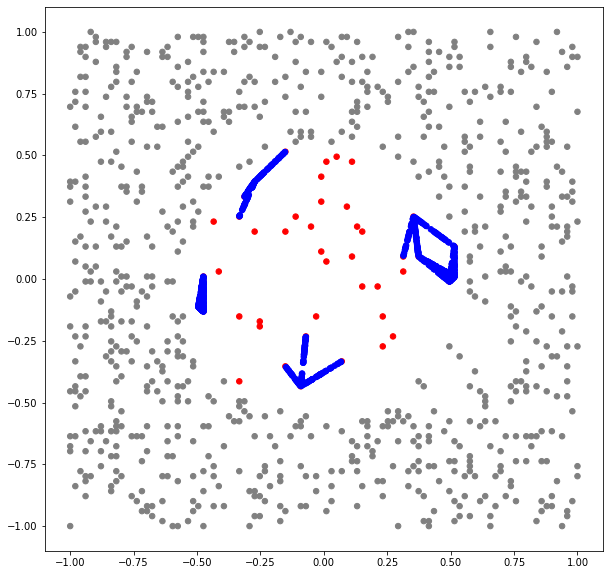

In [235]:
from imblearn.over_sampling import BorderlineSMOTE

sampler = BorderlineSMOTE(k_neighbors=3, m_neighbors=3)
new_X, new_y = sampler.fit_resample(X, y)

from copy import deepcopy
new_color = deepcopy(color)
for i, yi in enumerate(new_y):
  if i >= y.shape[0]:
    new_color.append('blue')
    
plt.figure(figsize=(10, 10))
plt.scatter(new_X[:, 0], new_X[:, 1], s=30, c=new_color)
plt.show()